## Leetcode 375: Guess Number Higher or Lower II
> We are playing the Guessing Game. The game will work as follows:  
> I pick a number between 1 and n.  
You guess a number.
If you guess the right number, you win the game.  
If you guess the wrong number, then I will tell you whether the number I picked is higher or lower, and you will continue guessing.  
Every time you guess a wrong number x, you will pay x dollars. If you run out of money, you lose the game.  
Given a particular n, return the minimum amount of money you need to guarantee a win regardless of what number I pick.



In [12]:
import numpy as np
from matplotlib import pyplot as plt

In [16]:
def min_money_to_win(n):
    """
    :type n: int
    :rtype: int
    """
    # v[i][j] denote the min money to guarantee win if number is between i+1 and j+1
    # v[i][i]=0, want v[0][n-1]

    v = []
    strategy = []
    for i in range(n):
        v.append([np.inf for j in range(n)])
        strategy.append([-1 for j in range(n)])

    for s in range(n):
        for i in range(n-s):
            j = i+s
            if i==j:
                v[i][j] = 0
                strategy[i][j] = i
            elif j-i==1:
                v[i][j] = i+1
                strategy[i][j] = i
            else:
                for k in range(i+1,j):
                    if v[i][j]>k+1+max(v[i][k-1],v[k+1][j]):
                        v[i][j] = k+1+max(v[i][k-1],v[k+1][j])
                        strategy[i][j] = k

    return v,strategy

In [17]:
a,b = min_money_to_win(500)

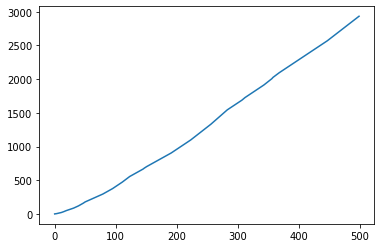

In [18]:
plt.plot(a[0])

In [8]:
b[0][499]

436

In [9]:
b[436][499]

468

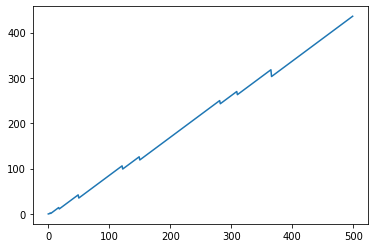

In [15]:
plt.plot(b[0])

## To compute the expected cost of the game, assuming uniform distribution of the number picked

In [21]:
def get_expected_cost(n):
    """
    :type n: int
    :rtype: int
    """
    # v[i][j] denote the min expected money to the game if number is between i and j
    # v[i][i]=0, want v[0][n-1]

    v = []
    strategy = []
    for i in range(n):
        v.append([np.inf for j in range(n)])
        strategy.append([-1 for j in range(n)])

    for s in range(n):
        for i in range(n-s):
            j = i+s
            if i==j:
                v[i][j] = 0
                strategy[i][j] = i
            else:
                for k in range(i,j+1):
                    if k==i:
                        if v[i][j] > (j-i)*1.0/(j-i+1)*(k + v[k+1][j]):
                            v[i][j] = (j-i)*1.0/(j-i+1)*(k + v[k+1][j])
                            strategy[i][j] = k
                    elif k==j:
                        if v[i][j] > (j-i)*1.0/(j-i+1)*(k + v[i][k-1]):
                            v[i][j] = (j-i)*1.0/(j-i+1)*(k + v[i][k-1])
                            strategy[i][j] = k
                    else:
                        if v[i][j] > k*(j-i)*1.0/(j-i+1) + v[i][k-1]*(k-i)*1.0/(j-i+1) + v[k+1][j]*(j-k)*1.0/(j-i+1):
                            v[i][j] = k*(j-i)*1.0/(j-i+1) + v[i][k-1]*(k-i)*1.0/(j-i+1) + v[k+1][j]*(j-k)*1.0/(j-i+1)
                            strategy[i][j] = k

    return v,strategy

In [22]:
v,s = get_expected_cost(500)

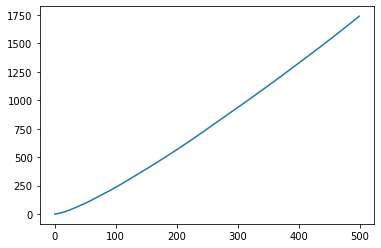

In [27]:
plt.plot(v[0])

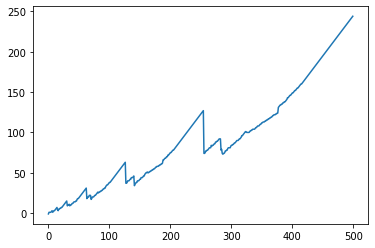

In [29]:
plt.plot(s[1])

In [31]:
list(reversed([5,6,7,8]))


[8, 7, 6, 5]

In [36]:
a = [[0]*3 for i in range(5)]

In [42]:
a[0][0]=1

In [43]:
a

[[1, 0, 0], [0, 1, 0], [0, 0, 0], [0, 0, 0], [0, 1, 0]]